# Training MNIST with Attention Mechanism : usefulness of the Context Vector

In [ ]:
from src.data import TokenDataset
from src.models import AttentionPool
from torch.utils.data import DataLoader
import torch 
from tqdm import tqdm 

DEVICE = "cuda:0"

train_set = TokenDataset(train=True)
train_loader = DataLoader(train_set, batch_size=128, shuffle=True)

## 1. Training a model 

In [2]:
# =========== Training ============
model_w = AttentionPool(use_fixed_query_vector=True).to(DEVICE)
model_wo = AttentionPool(use_fixed_query_vector=False).to(DEVICE)
optimizer_w = torch.optim.Adam(model_w.parameters(), lr=1e-4)
optimizer_wo = torch.optim.Adam(model_wo.parameters(), lr=1e-4)

epochs = 5
model_w.train()
model_wo.train()
for epoch in range(epochs):
    running_loss = [0,0]
    for x,y, x_origin in train_loader:
        for i, (model, optimizer) in enumerate(zip([model_w, model_wo], [optimizer_w, optimizer_wo])):
            x,y = x.to(DEVICE), y.to(DEVICE)
            y_hat = model(x)
            loss = torch.nn.CrossEntropyLoss()(y_hat, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss[i] += loss.item()

    print(running_loss)


[2707.5670619010925, 2014.0422642230988]
[1075.7676532268524, 1042.4243228435516]
[959.5477417707443, 990.9031058549881]
[916.9880771636963, 941.0123790502548]
[891.2349652051926, 886.4892749786377]


tensor(4) tensor(9, device='cuda:0')
tensor(4) tensor(4, device='cuda:0')


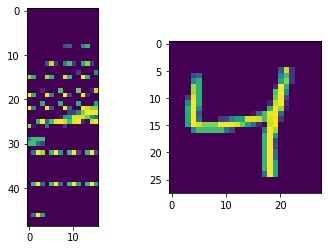

In [7]:
import matplotlib.pyplot as plt 

index = 2
data, y, data_origin = train_set[index]

fig, axes = plt.subplots(1,2)
axes[0].imshow(data.numpy())
axes[1].imshow(data_origin.numpy())

for model in [model_w, model_wo]:
    model.eval()
    y_hat = model(data.unsqueeze(0).to(DEVICE))
    print(y, y_hat.argmax())

## Implement the validation case

In [4]:
valid_set = TokenDataset(train=False)
valid_loader = DataLoader(valid_set)

# TODO evalute the trained model 